In [1]:
import sys
import os

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))  # Adjust if needed

# Add to Python path
if src_path not in sys.path:
    sys.path.append(src_path)

print(f"Added to path: {src_path}")

Added to path: c:\Users\Mohamed\Desktop\eeg-signal-classification\src


In [24]:
from preprocessing.preprocessing import preprocess_eeg_with_mne_freq_domain ,preprocess_eeg_with_mne_time_domain,plot_eeg_channels

In [3]:
from utils.load_data import load_metadata

In [5]:
metadata=load_metadata(r'D:\Stuff\Study\MTC_AIC3')
train=metadata['train']

In [9]:
X=preprocess_eeg_with_mne_freq_domain(train.iloc[0,:],fs=250,window_size_sec=2,stride_sec=0.5,l_freq=8,h_freq=30,notch_freq=50,resample_to=70)[0]

Creating RawArray with float64 data, n_channels=8, n_times=2250
    Range : 0 ... 2249 =      0.000 ...     8.996 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [47]:
y=preprocess_eeg_with_mne_time_domain(train.iloc[0,:],fs=250,window_size_sec=2,stride_sec=0.5,l_freq=8,h_freq=30,notch_freq=50,resample_to=70)[0]

Creating RawArray with float64 data, n_channels=8, n_times=2250
    Range : 0 ... 2249 =      0.000 ...     8.996 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Creating RawArray with float64 data, n_channels=8, n_times=2250
    Range : 0 ... 2249 =      0.000 ...     8.996 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


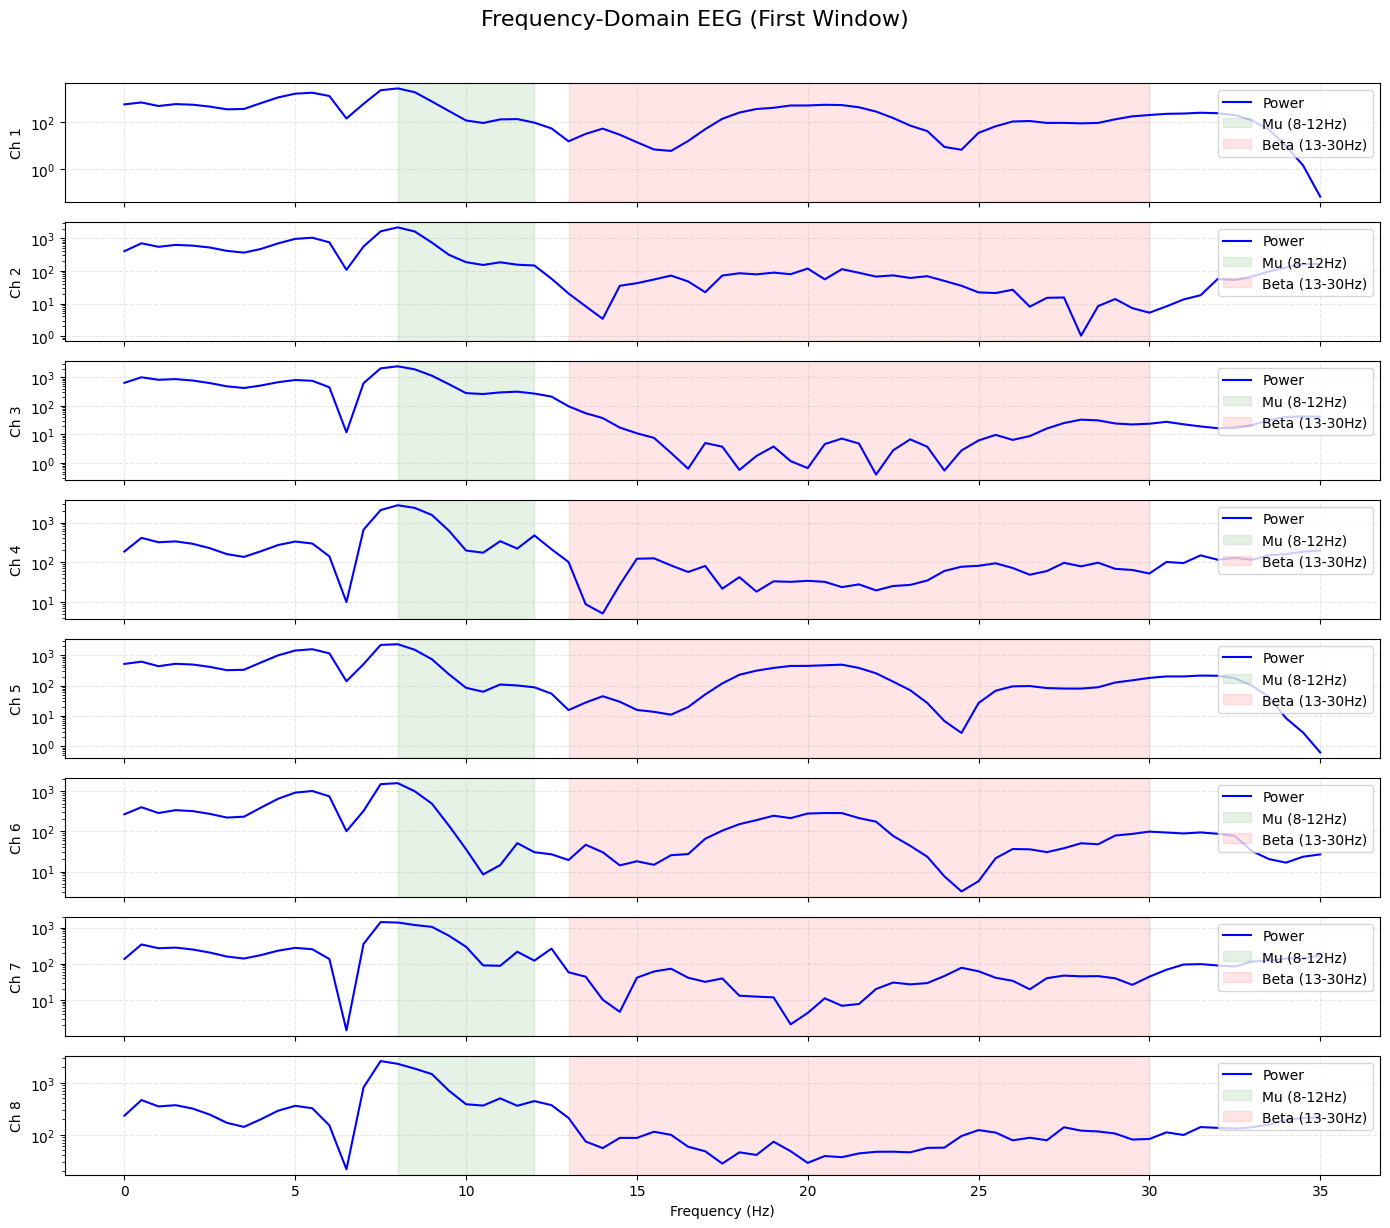

In [41]:
def plot_freq_domain_window(freq_data, freqs, channel_names=None, figsize=(14, 12)):
    """
    Plot frequency-domain EEG channels (power spectrum) on separate axes.
    
    Parameters:
        freq_data (ndarray): 3D array of shape (n_windows, n_channels, n_freq_bins)
        freqs (ndarray): Frequency values corresponding to bins
        channel_names (list): Optional list of channel names
        figsize (tuple): Figure size
    """
    # Select first window and average across epochs if needed
    if freq_data.ndim == 3:
        spectrum = freq_data[0]  # Shape (channels, freq_bins)
    else:
        spectrum = freq_data
    
    num_channels = spectrum.shape[0]
    
    if channel_names is None:
        channel_names = [f'Ch {i+1}' for i in range(num_channels)]

    fig, axs = plt.subplots(num_channels, 1, figsize=figsize, sharex=True)
    
    # Highlight frequency bands
    mu_band = (8, 12)
    beta_band = (13, 30)
    
    for i in range(num_channels):
        # Plot spectrum
        axs[i].plot(freqs, spectrum[i], label='Power', color='blue')
        
        # Highlight bands
        axs[i].axvspan(mu_band[0], mu_band[1], color='green', alpha=0.1, label='Mu (8-12Hz)')
        axs[i].axvspan(beta_band[0], beta_band[1], color='red', alpha=0.1, label='Beta (13-30Hz)')
        
        axs[i].set_ylabel(channel_names[i])
        axs[i].grid(True, linestyle='--', alpha=0.3)
        axs[i].legend(loc='upper right')
        
        # Set y-axis to log scale for better visualization
        axs[i].set_yscale('log')

    axs[-1].set_xlabel("Frequency (Hz)")
    fig.suptitle("Frequency-Domain EEG (First Window)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Process your data
X, freqs = preprocess_eeg_with_mne_freq_domain(
    train.iloc[0,:],
    fs=250,
    window_size_sec=2,
    stride_sec=0.5,
    l_freq=8,
    h_freq=30,
    notch_freq=50,
    resample_to=70
)

# Plot the first window
plot_freq_domain_window(X, freqs)

In [48]:
y=np.array(y)

In [49]:
y.shape

(15, 8, 140)

Creating RawArray with float64 data, n_channels=8, n_times=2250
    Range : 0 ... 2249 =      0.000 ...     8.996 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


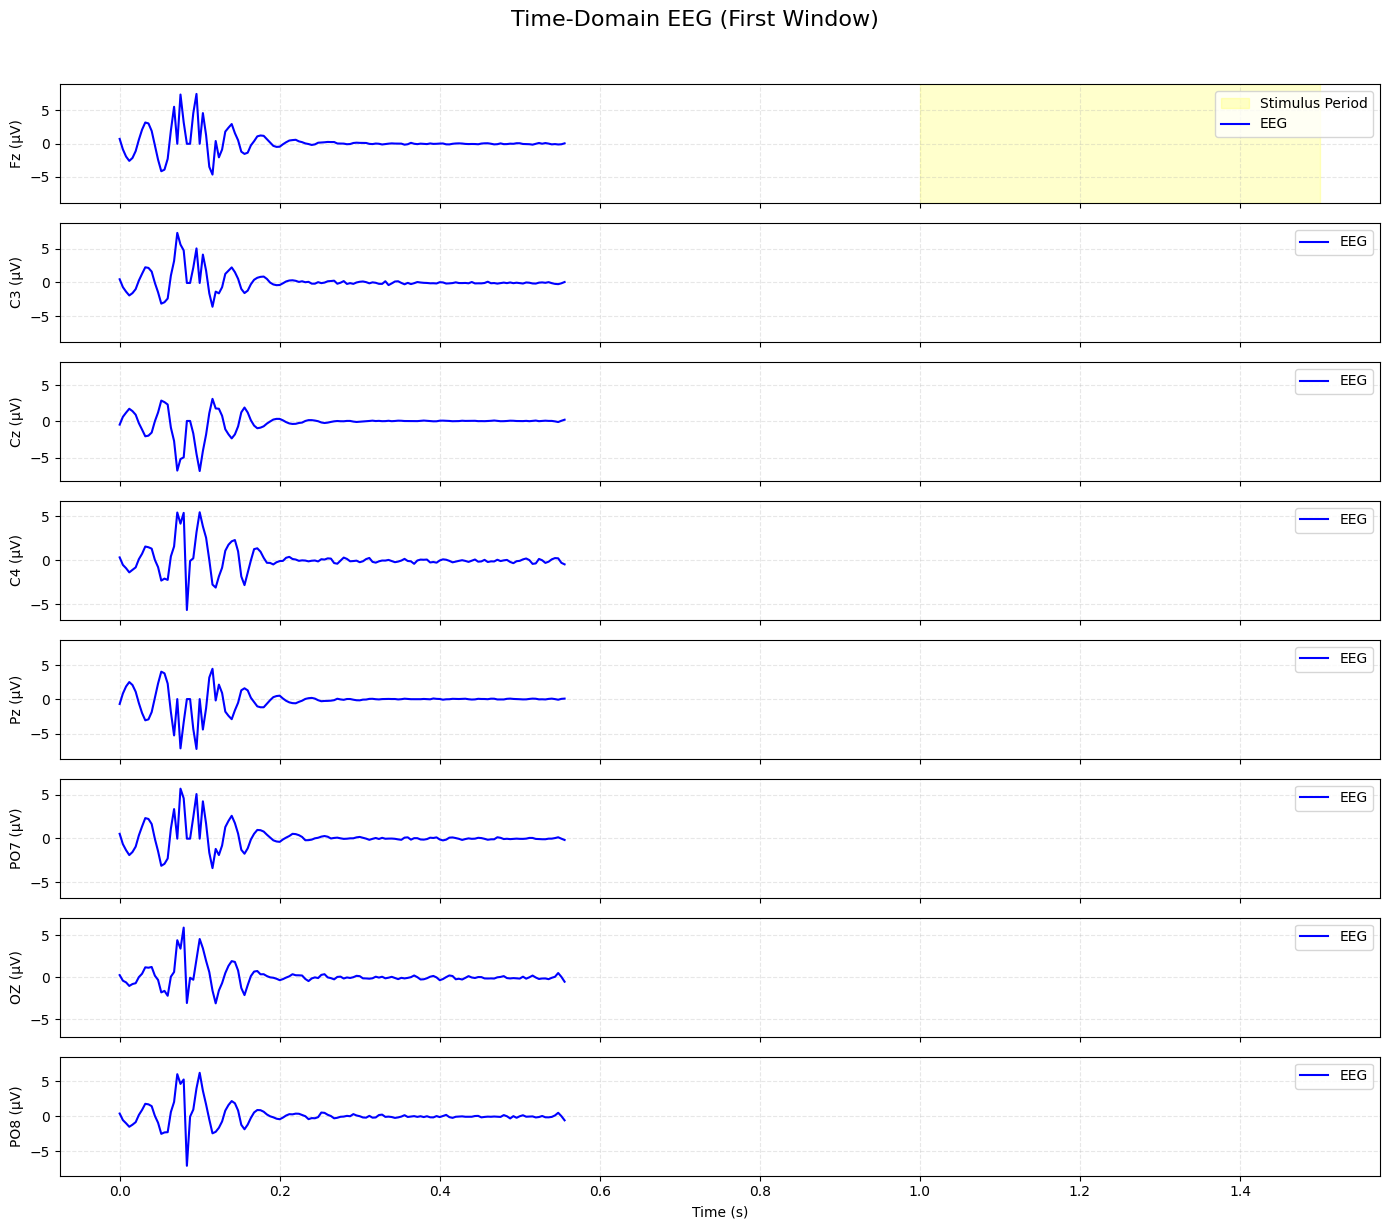

In [50]:
def plot_time_domain_window(time_data, fs=250, channel_names=None, figsize=(14, 12)):
    """
    Plot time-domain EEG channels on separate axes.
    
    Parameters:
        time_data (ndarray): 3D array of shape (n_windows, n_channels, n_samples)
                           or 2D array (n_channels, n_samples)
        fs (int): Sampling frequency in Hz
        channel_names (list): Optional list of channel names
        figsize (tuple): Figure size
    """
    # Select first window if 3D input
    if time_data.ndim == 3:
        eeg_data = time_data[0]  # Shape (channels, samples)
    else:
        eeg_data = time_data
    
    num_channels, num_samples = eeg_data.shape
    time = np.arange(num_samples) / fs  # Create time axis
    
    if channel_names is None:
        channel_names = [f'Ch {i+1}' for i in range(num_channels)]

    fig, axs = plt.subplots(num_channels, 1, figsize=figsize, sharex=True)
    
    # Highlight common time ranges of interest (e.g., stimulus onset)
    stimulus_onset = 1.0  # Example: stimulus appears at 1 second
    axs[0].axvspan(stimulus_onset, stimulus_onset+0.5, color='yellow', alpha=0.2, label='Stimulus Period')
    
    for i in range(num_channels):
        # Plot time series
        axs[i].plot(time, eeg_data[i], label='EEG', color='blue')
        
        axs[i].set_ylabel(f'{channel_names[i]} (µV)')
        axs[i].grid(True, linestyle='--', alpha=0.3)
        axs[i].legend(loc='upper right')
        
        # Set reasonable y-limits based on data
        y_range = np.max(np.abs(eeg_data[i])) * 1.2
        axs[i].set_ylim(-y_range, y_range)

    axs[-1].set_xlabel("Time (s)")
    fig.suptitle("Time-Domain EEG (First Window)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Process your time-domain data
X_time, _ = preprocess_eeg_with_mne_time_domain(
    train.iloc[0,:],
    fs=250,
    window_size_sec=2,
    stride_sec=0.5,
    l_freq=1,  # Wider band for time domain
    h_freq=45,
    notch_freq=50
)

# Plot the first window
plot_time_domain_window(
    y, 
    fs=250,
    channel_names=['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'OZ', 'PO8']
)

In [ ]:
import numpy as np
from scipy.stats import entropy

# Define band ranges (e.g., for mu and beta)
FREQS = np.linspace(8, 30, num=X.shape[2])  # assuming uniform bin spacing

def extract_mu_beta_bandpower(X, freqs=FREQS, mu_band=(8, 12), beta_band=(13, 30)):
    mu_mask = (freqs >= mu_band[0]) & (freqs <= mu_band[1])
    beta_mask = (freqs >= beta_band[0]) & (freqs <= beta_band[1])
    
    mu_power = X[:, :, mu_mask].mean(axis=2)
    beta_power = X[:, :, beta_mask].mean(axis=2)
    
    return mu_power, beta_power  # shape: (n_windows, n_channels)

def extract_spectral_entropy(X):
    # Normalize the spectrum to a probability distribution and compute entropy
    psd_norm = X / np.sum(X, axis=2, keepdims=True)
    ent = entropy(psd_norm, axis=2)
    return ent  # shape: (n_windows, n_channels)

def extract_spectral_edge_freq(X, freqs=FREQS, edge_ratio=0.9):
    cumulative_power = np.cumsum(X, axis=2)
    total_power = cumulative_power[:, :, -1:]
    edge_idx = (cumulative_power >= edge_ratio * total_power).argmax(axis=2)
    edge_freq = freqs[edge_idx]
    return edge_freq  # shape: (n_windows, n_channels)

def extract_peak_freq(X, freqs=FREQS):
    peak_idx = X.argmax(axis=2)
    peak_freqs = freqs[peak_idx]
    return peak_freqs  # shape: (n_windows, n_channels)

def extract_freq_stats(X):
    mean_power = X.mean(axis=2)
    std_power = X.std(axis=2)
    return mean_power, std_power  # each: (n_windows, n_channels)


In [ ]:
from scipy.signal import welch

def compute_psd(eeg_data, fs=250, bands=[(8, 13), (13, 30)]):
    """
    eeg_data: shape (num_windows, num_channels, num_time_points)
    fs: sampling frequency (resampled to 70 Hz)
    bands: list of tuples with frequency ranges (e.g., [(8, 13), (13, 30)])
    Returns: shape (num_windows, num_channels, num_bands)
    """
    num_windows, num_channels, _ = eeg_data.shape
    psd_features = np.zeros((num_windows, num_channels, len(bands)))
    for w in range(num_windows):
        for c in range(num_channels):
            freqs, psd = welch(eeg_data[w, c, :], fs=fs, nperseg=min(256, eeg_data.shape[2]))
            for b, (f_low, f_high) in enumerate(bands):
                band_mask = (freqs >= f_low) & (freqs <= f_high)
                psd_features[w, c, b] = np.sum(psd[band_mask])
    return psd_features

In [ ]:
np.array(extract_mu_beta_bandpower(X))[0]

array([[757.80875052, 628.991866  , 675.45173983, 253.48981187,
        730.24146129, 471.26556962, 218.95898173, 277.83710448],
       [ 19.20095719,  13.40078917,  12.7354774 ,  12.91166806,
         18.42333038,  12.90620065,   8.47493397,  10.98754365],
       [ 50.52259722,  54.9308882 ,  63.58682105,  97.58621594,
         52.69565451,  22.96068732, 120.24569353,  78.22767591],
       [ 70.68070892,  44.041814  , 118.02576088, 105.0118151 ,
         72.91065836,  15.24360568, 144.0640914 ,  89.69814314],
       [ 69.12194979,  40.37848278, 119.4356574 , 106.40654616,
         71.54470258,  14.24751119, 144.74896038,  90.64001384],
       [ 69.25457544,  40.3794633 , 119.25117498, 105.59086573,
         71.81903159,  14.39417505, 144.90805836,  89.99393924],
       [ 16.0697158 ,  22.87755166, 106.22514815,  63.39889141,
         15.93728848,  19.78098786,  74.25725906,  61.68238753],
       [  4.81958766,  13.27002278,  13.50668755,  14.60564657,
          4.85729623,   8.2548488

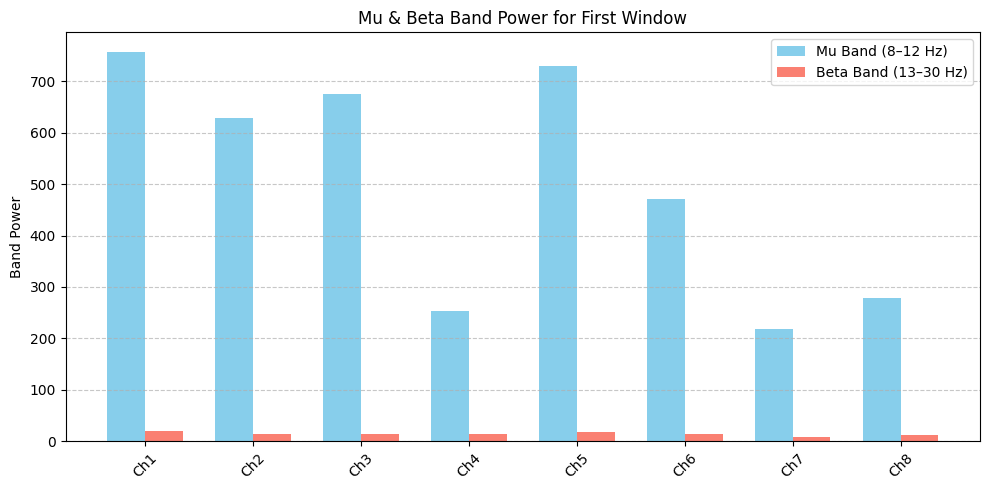

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume X is your preprocessed EEG data of shape (n_windows, n_channels, n_freq_bins)
# And extract_mu_beta_bandpower returns shape (n_windows, 2, n_channels)

features = np.array(extract_mu_beta_bandpower(X))  # shape: (n_windows, 2, n_channels)

first_window = features[0]  # shape: (2, n_channels)
mu_power = first_window[0]  # shape: (n_channels,)
beta_power = first_window[1]  # shape: (n_channels,)

channels = [f"Ch{i+1}" for i in range(len(mu_power))]  # customize with real channel names if you have them

# Plotting
x = np.arange(len(channels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, mu_power, width, label='Mu Band (8–12 Hz)', color='skyblue')
plt.bar(x + width/2, beta_power, width, label='Beta Band (13–30 Hz)', color='salmon')

plt.xticks(x, channels, rotation=45)
plt.ylabel("Band Power")
plt.title("Mu & Beta Band Power for First Window")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [51]:
def compute_mean(eeg_data):
    """
    eeg_data: shape (num_windows, num_channels, num_time_points)
    Returns: shape (num_windows, num_channels)
    """
    return np.mean(eeg_data, axis=2)

In [52]:
def compute_variance(eeg_data):
    """
    eeg_data: shape (num_windows, num_channels, num_time_points)
    Returns: shape (num_windows, num_channels)
    """
    return np.var(eeg_data, axis=2)

In [53]:
def compute_rms(eeg_data):
    """
    eeg_data: shape (num_windows, num_channels, num_time_points)
    Returns: shape (num_windows, num_channels)
    """
    return np.sqrt(np.mean(eeg_data**2, axis=2))

In [54]:
def compute_hjorth(eeg_data):
    """
    eeg_data: shape (num_windows, num_channels, num_time_points)
    Returns: activity, mobility, complexity (each shape: num_windows, num_channels)
    """
    activity = np.var(eeg_data, axis=2)  # Activity is variance
    diff1 = np.diff(eeg_data, axis=2)  # First derivative
    mobility = np.sqrt(np.var(diff1, axis=2) / activity)
    diff2 = np.diff(diff1, axis=2)  # Second derivative
    complexity = np.sqrt(np.var(diff2, axis=2) / np.var(diff1, axis=2)) / mobility
    return activity, mobility, complexity

In [58]:
y.shape

(15, 8, 140)

In [66]:
Y=np.array(compute_hjorth(y))[1]

In [67]:
Y.shape

(15, 8)